# Import libraries

In [1]:
import pandas as pd
import numpy as np

import re
import requests
import base64
from unidecode import unidecode

import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

from annoy import AnnoyIndex

# Data Importation

## Fifa 2022

In [2]:
df=pd.read_csv('FIFA22_official_data.csv')

In [3]:
df.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
5,212622,J. Kimmich,26,https://cdn.sofifa.com/players/212/622/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,89,90,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,79.0,8.0,15.0,7.0,15.0,15.0,CDM,89.0,€186.3M,85.0
6,187961,Paulinho,32,https://cdn.sofifa.com/players/187/961/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,83,83,Al Ahli,https://cdn.sofifa.com/teams/112387/30.png,...,75.0,16.0,16.0,11.0,6.0,8.0,CM,83.0,€48.5M,80.0
7,181291,G. Wijnaldum,30,https://cdn.sofifa.com/players/181/291/22_60.png,Netherlands,https://cdn.sofifa.com/flags/nl.png,84,84,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,70.0,16.0,6.0,14.0,12.0,6.0,CM,84.0,€74.9M,79.0
8,208333,E. Can,27,https://cdn.sofifa.com/players/208/333/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,82,83,Borussia Dortmund,https://cdn.sofifa.com/teams/22/30.png,...,86.0,14.0,8.0,8.0,13.0,11.0,CDM,85.0,€62.1M,81.0
9,194765,A. Griezmann,30,https://cdn.sofifa.com/players/194/765/22_60.png,France,https://cdn.sofifa.com/flags/fr.png,85,85,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,CAM,86.0,NaN,43.0


In [4]:
df["Name"]=df["Name"].apply(lambda name: unidecode(name))

In [5]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

## Comparer au fifa 2020 pour voir quelles données on garde

In [6]:
df_fifa20=pd.read_csv('sofifa2020.csv')

In [7]:
df_fifa20.head(5)

,name,photo_url,teams,league,contract,positions,age,height,weight,Overall Rating,...,DefensiveAwareness,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,player_traits,player_hashtags
0,Lionel Andrés Messi Cuccittini,https://cdn.sofifa.com/players/158/023/21_120.png,"FC Barcelona, Argentina",Spain Primera Division,2021.0,"['RW', 'ST', 'CF']",33,170,72,93,...,32,35,24,6,11,15,14,8,"['Finesse Shot', 'Long Shot Taker (AI)', 'Spee...","['#Dribbler', '#Distance Shooter', '#FK Specia..."
1,Cristiano Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_120.png,"Juventus, Portugal",Italian Serie A,2022.0,"['ST', 'LW']",35,187,83,92,...,28,32,24,7,11,15,14,11,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['#Aerial Threat', '#Dribbler', '#Distance Sho..."
2,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_120.png,"Atlético Madrid, Slovenia",Spain Primera Division,2023.0,['GK'],27,188,87,91,...,27,12,18,87,92,78,90,90,"['GK Long Throw', 'Comes For Crosses']",[]
3,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_120.png,"Manchester City, Belgium",English Premier League,2023.0,"['CM', 'CAM']",29,181,70,91,...,68,65,53,15,13,5,10,13,"['Injury Prone', 'Leadership', 'Early Crosser'...","['#Dribbler', '#Playmaker', '#Engine', '#Dista..."
4,Neymar da Silva Santos Júnior,https://cdn.sofifa.com/players/190/871/21_120.png,Paris Saint-Germain,French Ligue 1,2022.0,"['LW', 'CAM']",28,175,68,91,...,35,30,29,9,9,15,15,11,"['Injury Prone', 'Flair', 'Speed Dribbler (AI)...","['#Speedster', '#Dribbler', '#Playmaker', '#FK..."


## Gardons uniquement les joueurs de niveau supérieur (>76 général)

In [8]:
df=df[df['Overall']>76]

2022-03-08 02:01:40.053 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


## Sélection de la donnée 

In [9]:
#Colonnes communes entre fifa 22 et fifa 20
cols_to_keep=list(set(df.columns).intersection(df_fifa20.columns))

In [10]:
cols_to_keep

['Volleys',
 'Balance',
 'Wage',
 'Curve',
 'Value',
 'SlidingTackle',
 'GKReflexes',
 'Acceleration',
 'Crossing',
 'Vision',
 'Jumping',
 'Dribbling',
 'Preferred Foot',
 'HeadingAccuracy',
 'Interceptions',
 'ShotPower',
 'FKAccuracy',
 'Penalties',
 'Aggression',
 'SprintSpeed',
 'Positioning',
 'Agility',
 'GKKicking',
 'Strength',
 'Finishing',
 'Potential',
 'Release Clause',
 'GKPositioning',
 'ShortPassing',
 'DefensiveAwareness',
 'GKHandling',
 'Composure',
 'LongShots',
 'StandingTackle',
 'GKDiving',
 'Reactions',
 'Stamina',
 'BallControl',
 'LongPassing']

In [11]:
df_fifa20.columns # fifa 20

Index(['name', 'photo_url', 'teams', 'league', 'contract', 'positions', 'age',
       'height', 'weight', 'Overall Rating', 'Potential', 'Value', 'Wage',
       'Release Clause', 'Preferred Foot', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'DefensiveAwareness', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'player_traits', 'player_hashtags'],
      dtype='object')

In [12]:
df.columns # fifa 22

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [13]:
# Colonnes de fifa 20 qui ne sont pas dans le dataset fifa 22 (exemple sur Cristiano Ronaldo)
col_names=[]
for x in df_fifa20.columns:
    if x not in cols_to_keep:
        col_names.append(x)
for i in col_names:
    print(str(i)+" : "+str(df_fifa20.loc[1][i]))      

name : Cristiano Ronaldo dos Santos Aveiro
photo_url : https://cdn.sofifa.com/players/020/801/21_120.png
teams : Juventus, Portugal
league : Italian Serie A
contract : 2022.0
positions : ['ST', 'LW']
age : 35
height : 187
weight : 83
Overall Rating : 92
player_traits : ['Power Free-Kick', 'Flair', 'Long Shot Taker (AI)', 'Speed Dribbler (AI)', 'Outside Foot Shot']
player_hashtags : ['#Aerial Threat', '#Dribbler', '#Distance Shooter', '#Acrobat', '#Clinical Finisher', '#Complete Forward']


In [14]:
# Colonnes de fifa 22 qui ne sont pas dans fifa 20
col_names=[]
for x in df.columns:
    if x not in cols_to_keep:
        col_names.append(x)
for i in col_names:
    print(str(i)+" : "+str(df.loc[1][i]))      

ID : 209658
Name : L. Goretzka
Age : 26
Photo : https://cdn.sofifa.com/players/209/658/22_60.png
Nationality : Germany
Flag : https://cdn.sofifa.com/flags/de.png
Overall : 87
Club : FC Bayern München
Club Logo : https://cdn.sofifa.com/teams/21/30.png
Special : 2314
International Reputation : 4.0
Weak Foot : 4.0
Skill Moves : 3.0
Work Rate : High/ Medium
Body Type : Unique
Real Face : Yes
Position : <span class="pos pos11">LDM
Jersey Number : 8.0
Joined : Jul 1, 2018
Loaned From : nan
Contract Valid Until : 2026
Height : 189cm
Weight : 82kg
Marking : nan
Best Position : CM
Best Overall Rating : 87.0


In [15]:
# Affichage des colonnes et valeurs pour une ligne dans fifa 22
col_names=[]
for x in df.columns:
    col_names.append(x)
    index=0
for i in (df.loc[6]):
    print(str(col_names[index])+" : "+str(i))
    index+=1

ID : 187961
Name : Paulinho
Age : 32
Photo : https://cdn.sofifa.com/players/187/961/22_60.png
Nationality : Brazil
Flag : https://cdn.sofifa.com/flags/br.png
Overall : 83
Potential : 83
Club : Al Ahli
Club Logo : https://cdn.sofifa.com/teams/112387/30.png
Value : €28.5M
Wage : €61K
Special : 2273
Preferred Foot : Right
International Reputation : 3.0
Weak Foot : 4.0
Skill Moves : 4.0
Work Rate : High/ High
Body Type : Normal (170-185)
Real Face : Yes
Position : <span class="pos pos15">LCM
Jersey Number : 15.0
Joined : Jul 22, 2021
Loaned From : nan
Contract Valid Until : 2024
Height : 183cm
Weight : 80kg
Crossing : 67.0
Finishing : 83.0
HeadingAccuracy : 85.0
ShortPassing : 82.0
Volleys : 75.0
Dribbling : 82.0
Curve : 66.0
FKAccuracy : 75.0
LongPassing : 76.0
BallControl : 83.0
Acceleration : 73.0
SprintSpeed : 71.0
Agility : 72.0
Reactions : 82.0
Balance : 85.0
ShotPower : 83.0
Jumping : 92.0
Stamina : 91.0
Strength : 82.0
LongShots : 80.0
Aggression : 81.0
Interceptions : 80.0
Positio

In [16]:
# Ajout des colonnes intéressantes qui ne sont pas en commun entre fifa 20 et 22
index=0
for i in ['Name', 'Age', 'Photo', 'Nationality',"Best Position",'Flag','Club','Club Logo','Jersey Number','Overall','Height','Weight']:
    cols_to_keep.insert(index,i)
    index+=1

In [17]:
# Colonne gardées
cols_to_keep

['Name',
 'Age',
 'Photo',
 'Nationality',
 'Best Position',
 'Flag',
 'Club',
 'Club Logo',
 'Jersey Number',
 'Overall',
 'Height',
 'Weight',
 'Volleys',
 'Balance',
 'Wage',
 'Curve',
 'Value',
 'SlidingTackle',
 'GKReflexes',
 'Acceleration',
 'Crossing',
 'Vision',
 'Jumping',
 'Dribbling',
 'Preferred Foot',
 'HeadingAccuracy',
 'Interceptions',
 'ShotPower',
 'FKAccuracy',
 'Penalties',
 'Aggression',
 'SprintSpeed',
 'Positioning',
 'Agility',
 'GKKicking',
 'Strength',
 'Finishing',
 'Potential',
 'Release Clause',
 'GKPositioning',
 'ShortPassing',
 'DefensiveAwareness',
 'GKHandling',
 'Composure',
 'LongShots',
 'StandingTackle',
 'GKDiving',
 'Reactions',
 'Stamina',
 'BallControl',
 'LongPassing']

## Création nouveau dataframe

In [18]:
df=df[cols_to_keep]

In [19]:
#df.to_csv('df_final.csv')

# Data processing 

## Encoder les clubs et pays


In [20]:
df['Club_cat']=df['Club'].astype('category').cat.codes

In [21]:
df['Nationality_cat']=df['Nationality'].astype('category').cat.codes

In [22]:
#Nombre de clubs différents
len(df['Club'].unique())

217

## Process le format prix

In [23]:
df.dtypes

Name                   object
Age                     int64
Photo                  object
Nationality            object
Best Position          object
Flag                   object
Club                   object
Club Logo              object
Jersey Number         float64
Overall                 int64
Height                 object
Weight                 object
Volleys               float64
Balance               float64
Wage                   object
Curve                 float64
Value                  object
SlidingTackle         float64
GKReflexes            float64
Acceleration          float64
Crossing              float64
Vision                float64
Jumping               float64
Dribbling             float64
Preferred Foot         object
HeadingAccuracy       float64
Interceptions         float64
ShotPower             float64
FKAccuracy            float64
Penalties             float64
Aggression            float64
SprintSpeed           float64
Positioning           float64
Agility   

In [24]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return x

In [25]:
df['Wage']=df['Wage'].str.replace('€', '').apply(value_to_float)

In [26]:
df['Value']=df['Value'].str.replace('€', '').apply(value_to_float)

In [27]:
df['Height']=df['Height'].str.replace('[dA-Za-z]', '').astype('int')

In [28]:
df['Weight']=df['Weight'].str.replace('[dA-Za-z]', '').astype('int')

In [29]:
#rename Value en value in M€ and wage in wage in 
df=df.rename(columns={"Value": "Value (€)", "Wage": "Wage (€)"})

In [30]:
df['Value (€)']=df['Value (€)'].astype('int64')
df['Wage (€)']=df['Wage (€)'].astype('int64')
df=df[~df['Name'].str.contains(r'\d')]

# Data Exploration

## Taux de remplissage des colonnes

In [31]:
print('The DataFrame contains {} lines and {} columns.'.format(df.shape[0],df.shape[1]))

The DataFrame contains 1138 lines and 53 columns.


In [32]:
seuil=0.5
print('Pourcentage de valeurs Null > {} % par colonne :\n'.format(seuil))
i=0

col_to_check = []

for col in df.columns:
    res = (df[col].isnull().sum() / len(df)) * 100
    res = round(res,2)
    if col =='Best Position': # car STR
        break
    if res > 0.5:
        col_to_check.append(col)
        i += 1
        print(f'   - {col} : {res}%')
        
print("\nNombre colonnes ayant plus de {} % de valeurs nulles : {}" .format(seuil,i))
print('Les {} autres colonnes sont remplies à plus de {}%'.format(df.shape[1]-len(col_to_check),100-seuil))

Pourcentage de valeurs Null > 0.5 % par colonne :


Nombre colonnes ayant plus de 0.5 % de valeurs nulles : 0
Les 53 autres colonnes sont remplies à plus de 99.5%


## Exploration de la donnée selon la nationalité


### Le joueur le plus cher de chaque pays parmi les 100 joueurs les plus chers

In [33]:
top100_valuable_players=df.sort_values('Value (€)',ascending=False).head(200)

In [34]:
top100_valuable_players

,Name,Age,Photo,Nationality,Best Position,Flag,Club,Club Logo,Jersey Number,Overall,...,Composure,LongShots,StandingTackle,GKDiving,Reactions,Stamina,BallControl,LongPassing,Club_cat,Nationality_cat
82,K. Mbappe,22,https://cdn.sofifa.com/players/231/747/22_60.png,France,ST,https://cdn.sofifa.com/flags/fr.png,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,7.0,91,...,88.0,82.0,34.0,13.0,93.0,88.0,91.0,71.0,138,29
251,E. Haaland,20,https://cdn.sofifa.com/players/239/085/22_60.png,Norway,ST,https://cdn.sofifa.com/flags/no.png,Borussia Dortmund,https://cdn.sofifa.com/teams/22/30.png,9.0,88,...,84.0,87.0,43.0,7.0,88.0,82.0,85.0,51.0,31,55
39,H. Kane,27,https://cdn.sofifa.com/players/202/126/22_60.png,England,ST,https://cdn.sofifa.com/flags/gb-eng.png,Tottenham Hotspur,https://cdn.sofifa.com/teams/18/30.png,10.0,90,...,91.0,86.0,36.0,8.0,92.0,83.0,85.0,86.0,194,27
64,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,LW,https://cdn.sofifa.com/flags/br.png,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,10.0,91,...,93.0,81.0,32.0,9.0,89.0,81.0,95.0,81.0,138,9
3,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,CM,https://cdn.sofifa.com/flags/be.png,Manchester City,https://cdn.sofifa.com/teams/10/30.png,17.0,91,...,89.0,91.0,65.0,15.0,91.0,89.0,91.0,93.0,118,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Ronaldo Cabrais,29,https://cdn.sofifa.com/players/230/481/22_60.png,Brazil,RM,https://cdn.sofifa.com/flags/br.png,Grêmio,https://cdn.sofifa.com/teams/1629/30.png,7.0,83,...,81.0,78.0,35.0,12.0,84.0,88.0,83.0,82.0,95,9
464,A. Kramaric,30,https://cdn.sofifa.com/players/216/354/22_60.png,Croatia,ST,https://cdn.sofifa.com/flags/hr.png,TSG Hoffenheim,https://cdn.sofifa.com/teams/10029/30.png,27.0,83,...,83.0,85.0,20.0,8.0,84.0,76.0,86.0,63.0,189,21
853,Mario Hermoso,26,https://cdn.sofifa.com/players/229/668/22_60.png,Spain,CB,https://cdn.sofifa.com/flags/es.png,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,22.0,82,...,79.0,46.0,84.0,13.0,82.0,77.0,75.0,77.0,24,68
13,D. Alaba,29,https://cdn.sofifa.com/players/197/445/22_60.png,Austria,CB,https://cdn.sofifa.com/flags/at.png,Real Madrid CF,https://cdn.sofifa.com/teams/243/30.png,4.0,84,...,85.0,78.0,83.0,5.0,88.0,75.0,84.0,80.0,154,6


In [35]:
df_agg = top100_valuable_players.groupby(["Nationality",'Name']).agg({'Value (€)':sum})

In [36]:
g = df_agg['Value (€)'].groupby('Nationality', group_keys=False)

In [37]:
res = g.apply(lambda x: x.sort_values(ascending=False).head(1))

In [38]:
res=pd.DataFrame(res).sort_values('Value (€)',ascending=False)

In [39]:
pd.DataFrame(res).sort_values('Value (€)',ascending=False).style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,,Value (€)
Nationality,Name,
France,K. Mbappe,194000000
Norway,E. Haaland,137500000
England,H. Kane,129500000
Brazil,Neymar Jr,129000000
Belgium,K. De Bruyne,125500000
Italy,G. Donnarumma,119500000
Poland,R. Lewandowski,119500000
Netherlands,F. de Jong,119500000
Slovenia,J. Oblak,112000000


### Parmi les meilleurs, voir si la nationalité joue sur le prix

In [40]:
a=pd.DataFrame(top100_valuable_players.groupby(["Nationality"]).sum()['Value (€)'].sort_values(ascending=False))

WE CAN SEE THAT NATIONALITY HAVE AN IMPACT ON PLAYERS PRICE


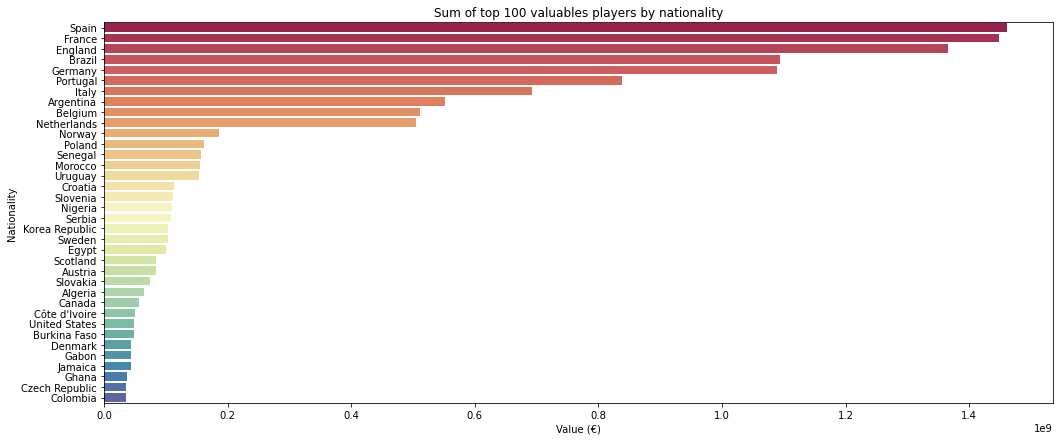

In [41]:
f, ax = plt.subplots(figsize=(17, 7))
sns.barplot(x=a['Value (€)'],y=a.index,data=a, palette='Spectral')
plt.title('Sum of top 100 valuables players by nationality')
print('WE CAN SEE THAT NATIONALITY HAVE AN IMPACT ON PLAYERS PRICE')

## Visualiser les meilleurs joueurs par pays


### Récupération des Latitudes et Longitudes des pays

In [42]:
#Changement pour d'intitulé pour la Corée du Sud car il n'est pas reconnu par la librairie
df['Nationality']=df['Nationality'].replace(['Korea Republic'],'Korea')

In [43]:
top75_bestplayers=df[df['Overall']>85]
top75_bestplayers.head(5)

,Name,Age,Photo,Nationality,Best Position,Flag,Club,Club Logo,Jersey Number,Overall,...,Composure,LongShots,StandingTackle,GKDiving,Reactions,Stamina,BallControl,LongPassing,Club_cat,Nationality_cat
0,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,CAM,https://cdn.sofifa.com/flags/pt.png,Manchester United,https://cdn.sofifa.com/teams/11/30.png,18.0,88,...,87.0,89.0,73.0,12.0,91.0,91.0,87.0,88.0,119,59
1,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,CM,https://cdn.sofifa.com/flags/de.png,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,8.0,87,...,82.0,86.0,85.0,13.0,88.0,88.0,87.0,84.0,72,31
2,L. Suarez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,ST,https://cdn.sofifa.com/flags/uy.png,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,9.0,88,...,87.0,88.0,45.0,27.0,92.0,78.0,86.0,77.0,24,77
3,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,CM,https://cdn.sofifa.com/flags/be.png,Manchester City,https://cdn.sofifa.com/teams/10/30.png,17.0,91,...,89.0,91.0,65.0,15.0,91.0,89.0,91.0,93.0,118,7
5,J. Kimmich,26,https://cdn.sofifa.com/players/212/622/22_60.png,Germany,CDM,https://cdn.sofifa.com/flags/de.png,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,6.0,89,...,85.0,84.0,85.0,8.0,88.0,94.0,85.0,90.0,72,31


In [44]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="knn_similar_players.ipynb")

def geolocate(country):
    try:
        geocode = RateLimiter(geolocator.geocode, min_delay_seconds=4)
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return None
        

In [45]:
top75_bestplayers['geolocate']=top75_bestplayers['Nationality'].apply(geolocate)

<ipython-input-45-ec5a2ec00414>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top75_bestplayers['geolocate']=top75_bestplayers['Nationality'].apply(geolocate)


In [46]:
top75_bestplayers[['latitude', 'longitude']]=pd.DataFrame(top75_bestplayers['geolocate'].tolist(), index=top75_bestplayers.index)
#df.to_csv('df_final.csv')

C:\Users\thoma\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [47]:
# Create a world map to show distributions of top 75 players
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(top75_bestplayers)):
        lat = top75_bestplayers.iloc[i]['latitude']
        long = top75_bestplayers.iloc[i]['longitude']
        radius=10
        popup_text = """{}, {}
                    Rating : {}
                    """
        popup_text = popup_text.format(top75_bestplayers.iloc[i]['Name'],top75_bestplayers.iloc[i]['Club'],
                                   top75_bestplayers.iloc[i]['Overall']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

## Meilleurs talents

In [48]:
df['Evolution']=df['Potential']-df['Overall']

In [49]:
# Nous enlevons les joueurs qui ont un salaire = 0 car ce sont les légendes du jeu qui ont un potentiel important
a=df[df['Wage (€)']!=0].sort_values('Evolution',ascending=False)[['Name','Age','Club','Overall','Potential','Evolution','Value (€)']].head(15)
a.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True),subset=['Evolution','Value (€)'])

,Name,Age,Club,Overall,Potential,Evolution,Value (€)
373,R. Gravenberch,19,Ajax,78,90,12,33000000
4568,J. Doku,19,Stade Rennais FC,77,88,11,23000000
300,E. Camavinga,18,Real Madrid CF,78,89,11,29500000
2517,N. Madueke,19,PSV,77,88,11,23000000
1822,F. Wirtz,18,Bayer 04 Leverkusen,78,89,11,29500000
1582,M. Greenwood,19,Manchester United,78,89,11,30500000
835,Nuno Mendes,19,Paris Saint-Germain,78,88,10,29000000
1424,D. Szoboszlai,20,RB Leipzig,77,87,10,23000000
2753,C. Hudson-Odoi,20,Chelsea,77,87,10,23000000
358,J. Bellingham,18,Borussia Dortmund,79,89,10,37000000


Text(0.5, 1.0, 'Best possible evolutions of players')

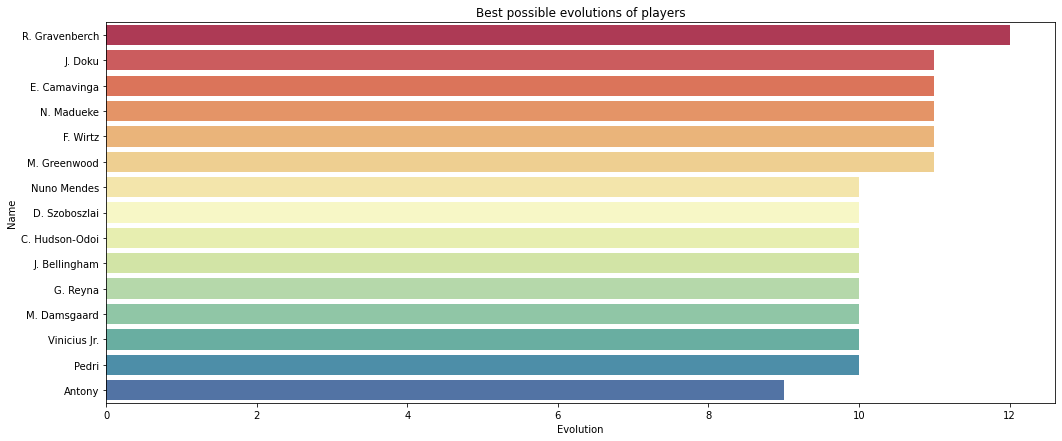

In [50]:
f, ax = plt.subplots(figsize=(17, 7))
sns.barplot(x=a['Evolution'],y=a.Name,data=a, palette='Spectral')
plt.title('Best possible evolutions of players')

### Les pieds des meilleurs joueurs

Text(0.5, 1.0, 'Top 75 best players preferred foot')

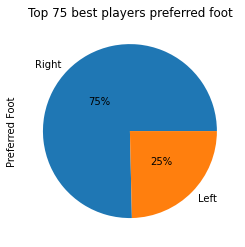

In [51]:
top75_bestplayers['Preferred Foot'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.title('Top 75 best players preferred foot')

### Répartition des tailles et poids des 75 meilleurs

Text(0.5, 1.0, 'Repartition of Height and Weight of the top 75')

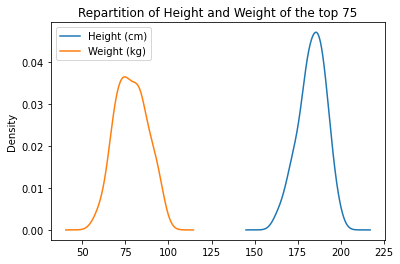

In [52]:
top75_bestplayers=top75_bestplayers.rename(columns={'Height':'Height (cm)','Weight':'Weight (kg)'})

top75_bestplayers['Height (cm)'].plot.kde()
top75_bestplayers['Weight (kg)'].plot.kde()
plt.legend()
plt.title('Repartition of Height and Weight of the top 75')

## Etude des clubs

### Clubs ayant les équipes les plus chères

In [53]:
a=pd.DataFrame(df.groupby(['Club']).sum()['Value (€)'].sort_values(ascending=False)).head(20)

Text(0.5, 1.0, 'Ranking of club having the most valuables players')

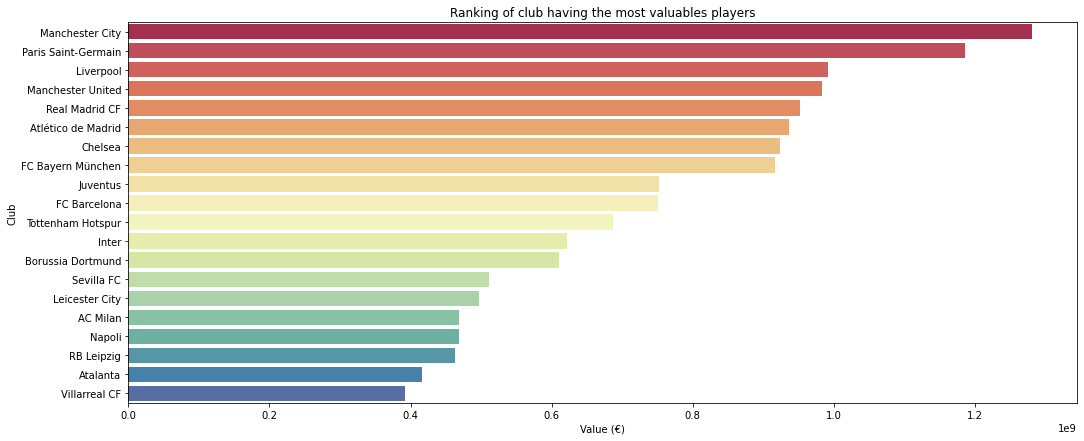

In [54]:
f, ax = plt.subplots(figsize=(17, 7))
sns.barplot(x=a['Value (€)'],y=a.index,data=a, palette='Spectral')
plt.title('Ranking of club having the most valuables players')

### Clubs ayant les meilleurs espoirs

In [55]:
a=pd.DataFrame(df.groupby(['Club']).sum()['Evolution'].sort_values(ascending=False)).head(20)

Text(0.5, 1.0, 'Ranking of club having the most talented players')

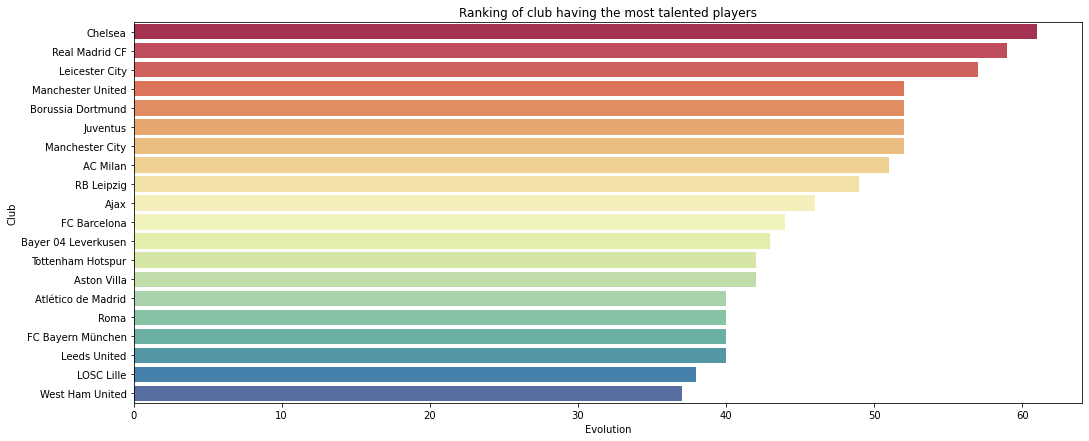

In [56]:
f, ax = plt.subplots(figsize=(17, 7))
sns.barplot(x=a['Evolution'],y=a.index,data=a, palette='Spectral')
plt.title('Ranking of club having the most talented players')

### Clubs ayant les joueurs les plus grands

In [57]:
a=pd.DataFrame(df.groupby(['Club']).mean()['Height'].sort_values(ascending=False)).head(20)

Text(0.5, 1.0, 'Ranking of club having the tallest players')

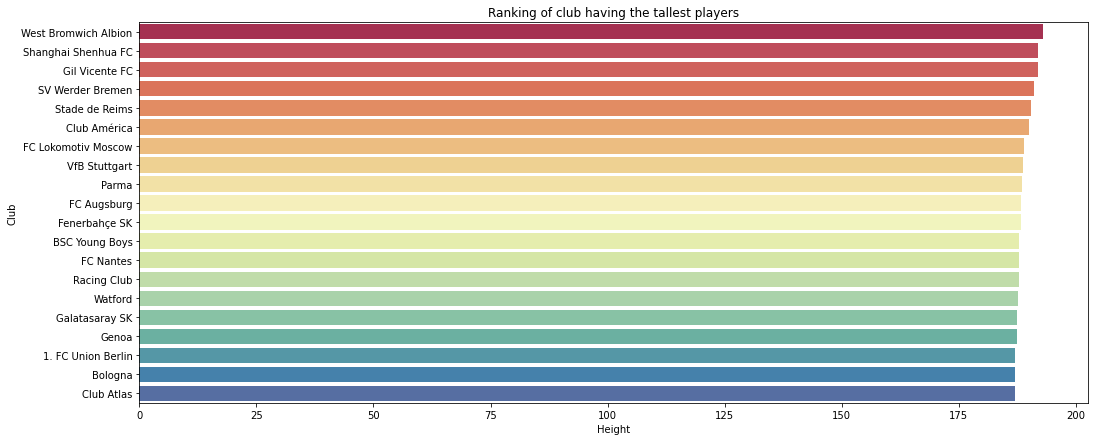

In [58]:
f, ax = plt.subplots(figsize=(17, 7))
sns.barplot(x=a['Height'],y=a.index,data=a, palette='Spectral')
plt.title('Ranking of club having the tallest players')

### Clubs ayant les joueurs les plus lourds

In [59]:
a=pd.DataFrame(df.groupby(['Club']).mean()['Weight'].sort_values(ascending=False)).head(20)

Text(0.5, 1.0, 'Ranking of club having the heaviest players')

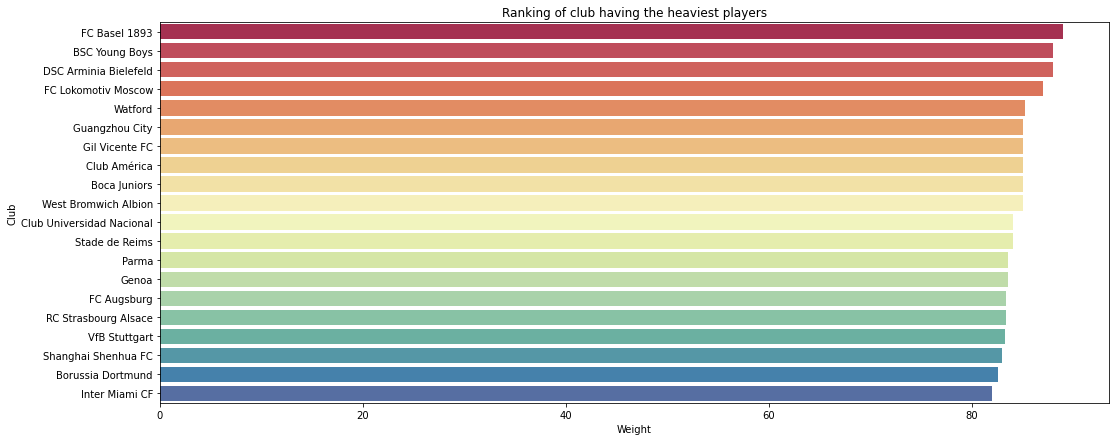

In [60]:
f, ax = plt.subplots(figsize=(17, 7))
sns.barplot(x=a['Weight'],y=a.index,data=a, palette='Spectral')
plt.title('Ranking of club having the heaviest players')

## Data Visualisation

### Radar chart joueurs 

In [61]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.style.use('seaborn')

color1=(0,152/255,158/255,0.8)
color2=(180/255,215/255,141/255,0.8)
color3=(255/255,230/255,122/255,0.8)
color4=(246/255,172/255,26/255,0.8)
color5=(216/255,34/255,13/255,0.8)
colors=[color1,color2,color3,color4,color5]

def base_info(player):
    if player.empty:
        print("Can't find a player with sofifa_id = "+str(sofifa_id))
    else:
        player=player.reset_index()
        print('Name: '+player['Name'][0])
        print('Age: '+str(player['Age'][0]))
        print('Nation: '+player['Nationality'][0])
        print('Club: '+player['Club'][0])
        print('Overall Rating: '+str(player['Overall'][0]))
        

base_info(df[df['Name']=="Thiago Silva"])


Name: Thiago Silva
Age: 36
Nation: Brazil
Club: Chelsea
Overall Rating: 85


In [62]:
def radar_plot(player):

    player=player.reset_index()

    angles=np.linspace(0,2*np.pi,6,endpoint=False)
    angles=np.concatenate((angles, [0]))

    #Detect if GoalKeeper or not
    if player['GKDiving'].values[0]<30:
        attributes=player.loc[0,['Acceleration','Finishing','Agility','Dribbling','StandingTackle','Strength','BallControl']]
        labels=('ACCELERATION\n{:d}'.format(int(player.loc[0,'Acceleration'])),
                'FINISHING\n{:d}\n'.format(int(player.loc[0,'Finishing'])),
                'AGILITY\n{:d}\n'.format(int(player.loc[0,'Agility'])),
                'DRIBBLING\n{:d}'.format(int(player.loc[0,'Dribbling'])),
                '\nTACKLE\n{:d}'.format(int(player.loc[0,'StandingTackle'])),
                '\nPHYSIC\n{:d}'.format(int(player.loc[0,'Strength'])),
                'CONTROL\n{:d}'.format(int(player.loc[0,'BallControl'])))
    else:
        attributes=player.loc[0,['GKDiving','GKHandling','GKKicking','GKReflexes','Reactions','GKPositioning','GKDiving']]
        labels=('DIV\n{:d}'.format(int(player.loc[0,'GKDiving'])),
                'HAN\n{:d}\n'.format(int(player.loc[0,'GKHandling'])),
                'KIC\n{:d}\n'.format(int(player.loc[0,'GKKicking'])),
                'REF\n{:d}'.format(int(player.loc[0,'GKReflexes'])),
                '\nREACTIONS\n{:d}'.format(int(player.loc[0,'Reactions'])),
                '\nPOS\n{:d}'.format(int(player.loc[0,'GKPositioning'])),
                'DIV\n{:d}'.format(int(player.loc[0,'GKDiving'])))

    fig=plt.figure(figsize=(5,5))
    rect0 = [0, 0, 1, 1]
    rect1 = [0.00005, 0.00005, 0.9999, 0.9999]
    rect2 = [0.1, 0.1, 0.8, 0.8]
    rect3 = [0.2, 0.2, 0.6, 0.6]
    rect4 = [0.3, 0.3, 0.4, 0.4]
    rect5 = [0.4, 0.4, 0.2, 0.2]

    rects=[rect1,rect2,rect3,rect4,rect5]

    for rect,col in zip(rects,colors):
        bk=plt.axes(rect,projection='polar')
        bk.fill(angles,[1,1,1,1,1,1,1],color=col)
        bk.set_ylim(0,1)
        bk.axis('off')

    rdp=plt.axes(rect0,projection='polar')
    rdp.plot(angles,attributes,color='#222222',linestyle="-",lw=2)
    rdp.fill(angles,attributes,color='#222222',alpha=0.3)
    rdp.set_thetagrids(angles/np.pi*180,labels,fontsize=13)
    rdp.set_title(player.Name[0],fontsize=20)
    rdp.patch.set_alpha(0)
    rdp.set_rticks([])
    rdp.set_ylim(0,100)
    #rdp.axis('off')
    plt.show()

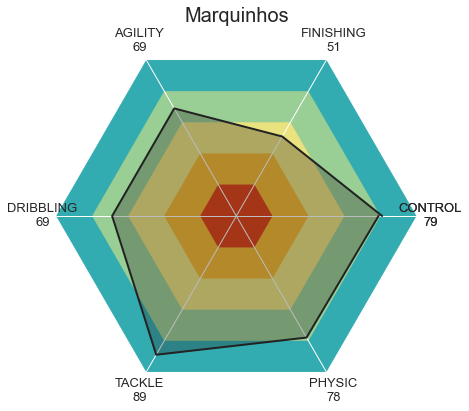

In [63]:
radar_plot(df[df['Name'].str.contains('Marquinhos')])